### Supplementary Notebook 3A
---
### Scanpy analysis performed on 1.1 Million cell mouse brain dataset [(Yao et al., 2020)](https://doi.org/10.1101/2020.03.30.015214)

This dataset is shown in **Figure 3A** of the manuscript.

**Preprint**: [A taxonomy of transcriptomic cell types across the isocortex and hippocampal formation](https://www.biorxiv.org/content/10.1101/2020.03.30.015214v1) 

**Raw Data**: [link](https://portal.brain-map.org/atlases-and-data/rnaseq/mouse-whole-cortex-and-hippocampus-10x) 

---
First, we will run the standard preprocessing analysis from scanpy. The data can be downloaded from the link above and with the `matrix.csv` file anyone should be able to reproduce the following analysis. 

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
results_file = 'mousebrain_scanpy.h5ad'  # the file that will store the analysis results

In [5]:
adata = sc.read_csv('matrix.csv')

In [55]:
adata.obs = pd.read_csv('./metadata.csv')
adata.obs = adata.obs.set_index('sample_name', drop=True)
adata.obs.head()

,exp_component_name,platform_label,cluster_color,cluster_order,cluster_label,class_color,class_order,class_label,subclass_color,subclass_order,...,injection_method_label,injection_roi_color,injection_roi_id,injection_roi_label,injection_type_color,injection_type_id,injection_type_label,cortical_layer_label,outlier_call,outlier_type
sample_name,,,,,,,,,,,,,,,,,,,,,
ACTGAGTAGGTGACCA-L8TX_180221_01_C11,ACTGAGTAGGTGACCA-2L8TX_180221_01_C11,10x,#5E5765,355.0,355_V3d,#00ADEE,2.0,Glutamatergic,#5E5765,37.0,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
TCAACGACAGACAGGT-L8TX_180221_01_B11,TCAACGACAGACAGGT-1L8TX_180221_01_B11,10x,#5E5765,355.0,355_V3d,#00ADEE,2.0,Glutamatergic,#5E5765,37.0,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
CTCGTACTCACGACTA-L8TX_180221_01_C11,CTCGTACTCACGACTA-2L8TX_180221_01_C11,10x,#5E5765,355.0,355_V3d,#00ADEE,2.0,Glutamatergic,#5E5765,37.0,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
CACCAGGCAGGTCTCG-L8TX_180221_01_C11,CACCAGGCAGGTCTCG-2L8TX_180221_01_C11,10x,#5E5765,355.0,355_V3d,#00ADEE,2.0,Glutamatergic,#5E5765,37.0,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
GACTGCGCAAAGGTGC-L8TX_180221_01_C11,GACTGCGCAAAGGTGC-2L8TX_180221_01_C11,10x,#5E5765,355.0,355_V3d,#00ADEE,2.0,Glutamatergic,#5E5765,37.0,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN


In [57]:
adata

AnnData object with n_obs × n_vars = 1093036 × 31053
    obs: 'exp_component_name', 'platform_label', 'cluster_color', 'cluster_order', 'cluster_label', 'class_color', 'class_order', 'class_label', 'subclass_color', 'subclass_order', 'subclass_label', 'full_genotype_color', 'full_genotype_id', 'full_genotype_label', 'sex_color', 'sex_id', 'donor_sex_label', 'region_color', 'region_id', 'region_label', 'cell_type_accession_color', 'cell_type_accession_id', 'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_alias_id', 'cell_type_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_id', 'cell_type_alt_alias_label', 'cell_type_designation_color', 'cell_type_designation_id', 'cell_type_designation_label', 'neighborhood_label', 'neighborhood_id', 'neighborhood_color', 'external_donor_name_color', 'external_donor_name_id', 'external_donor_name_label', 'facs_population_plan_color', 'facs_population_plan_id', 'facs_population_plan_label', 'injection_materials_color', 'i

In [56]:
adata.var.head()

""
Xkr4
Gm1992
Gm37381
Rp1
Sox17


In [2]:
x = ['exp_component_name', 'platform_label', 'cluster_color', 'cluster_order', 'cluster_label', 'class_color', 'class_order', 'class_label', 'subclass_color', 'subclass_order', 'subclass_label', 'full_genotype_color', 'full_genotype_id', 'full_genotype_label', 'sex_color', 'sex_id', 'donor_sex_label', 'region_color', 'region_id', 'region_label', 'cell_type_accession_color', 'cell_type_accession_id', 'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_alias_id', 'cell_type_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_id', 'cell_type_alt_alias_label', 'cell_type_designation_color', 'cell_type_designation_id', 'cell_type_designation_label', 'neighborhood_label', 'neighborhood_id', 'neighborhood_color', 'external_donor_name_color', 'external_donor_name_id', 'external_donor_name_label', 'facs_population_plan_color', 'facs_population_plan_id', 'facs_population_plan_label', 'injection_materials_color', 'injection_materials_id', 'injection_materials_label', 'injection_method_color', 'injection_method_id', 'injection_method_label', 'injection_roi_color', 'injection_roi_id', 'injection_roi_label', 'injection_type_color', 'injection_type_id', 'injection_type_label', 'cortical_layer_label', 'outlier_call', 'outlier_type']

for i in x:
    print(i)

exp_component_name
platform_label
cluster_color
cluster_order
cluster_label
class_color
class_order
class_label
subclass_color
subclass_order
subclass_label
full_genotype_color
full_genotype_id
full_genotype_label
sex_color
sex_id
donor_sex_label
region_color
region_id
region_label
cell_type_accession_color
cell_type_accession_id
cell_type_accession_label
cell_type_alias_color
cell_type_alias_id
cell_type_alias_label
cell_type_alt_alias_color
cell_type_alt_alias_id
cell_type_alt_alias_label
cell_type_designation_color
cell_type_designation_id
cell_type_designation_label
neighborhood_label
neighborhood_id
neighborhood_color
external_donor_name_color
external_donor_name_id
external_donor_name_label
facs_population_plan_color
facs_population_plan_id
facs_population_plan_label
injection_materials_color
injection_materials_id
injection_materials_label
injection_method_color
injection_method_id
injection_method_label
injection_roi_color
injection_roi_id
injection_roi_label
injection_type_col

In [58]:
adata.write(results_file)

... storing 'platform_label' as categorical
... storing 'cluster_color' as categorical
... storing 'cluster_label' as categorical
... storing 'class_color' as categorical
... storing 'class_label' as categorical
... storing 'subclass_color' as categorical
... storing 'subclass_label' as categorical
... storing 'full_genotype_color' as categorical
... storing 'full_genotype_label' as categorical
... storing 'sex_color' as categorical
... storing 'donor_sex_label' as categorical
... storing 'region_color' as categorical
... storing 'region_label' as categorical
... storing 'cell_type_accession_color' as categorical
... storing 'cell_type_accession_label' as categorical
... storing 'cell_type_alias_color' as categorical
... storing 'cell_type_alias_label' as categorical
... storing 'cell_type_alt_alias_color' as categorical
... storing 'cell_type_designation_color' as categorical
... storing 'cell_type_designation_label' as categorical
... storing 'neighborhood_label' as categorical
... s

In [59]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

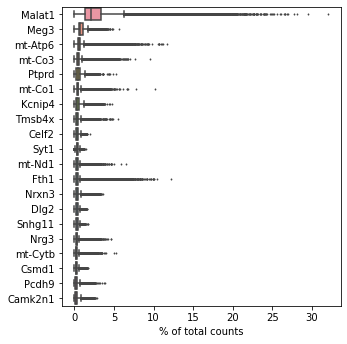

In [60]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [62]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [ ]:
sc.pp.scale(adata, max_value=10)

Now that we've done the relatively "standard" Scanpy preprocessing analysis, we can do a bit of data wrangling and adjustment to get things into proper order for preparation wtih `scvr`.

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='Kdm1a')
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata, n_components=3)

Quickly plot some of my favorite genes just to see how it looks:

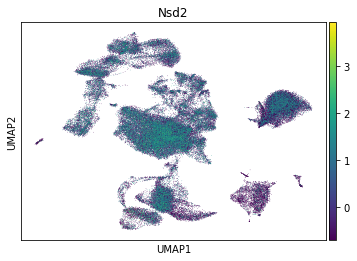

In [89]:
sc.pl.umap(adata, color=['Nsd2'])

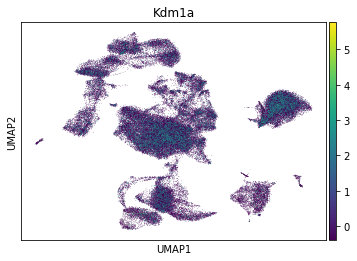

In [83]:
sc.pl.umap(adata, color=['Kdm1a'])

In [ ]:
sc.tl.leiden(adata)
sc.tl.louvain(adata)

In [9]:
adata.raw = adata

Quick save

In [11]:
adata.write('./mousebrain_scanpy_raw.h5ad')

Let's pull out the high variance genes for annotations in 3D VR.

In [91]:
highvar = adata.var.loc[adata.var.highly_variable == True][0:10].index # .sort_values('n_cells', ascending = False)[0:10].index
highvar = adata.var.loc[adata.var.highly_variable == True][0:50].sort_values('n_cells', ascending = False)[0:20].index

Plot UMAPs for high-variance genes

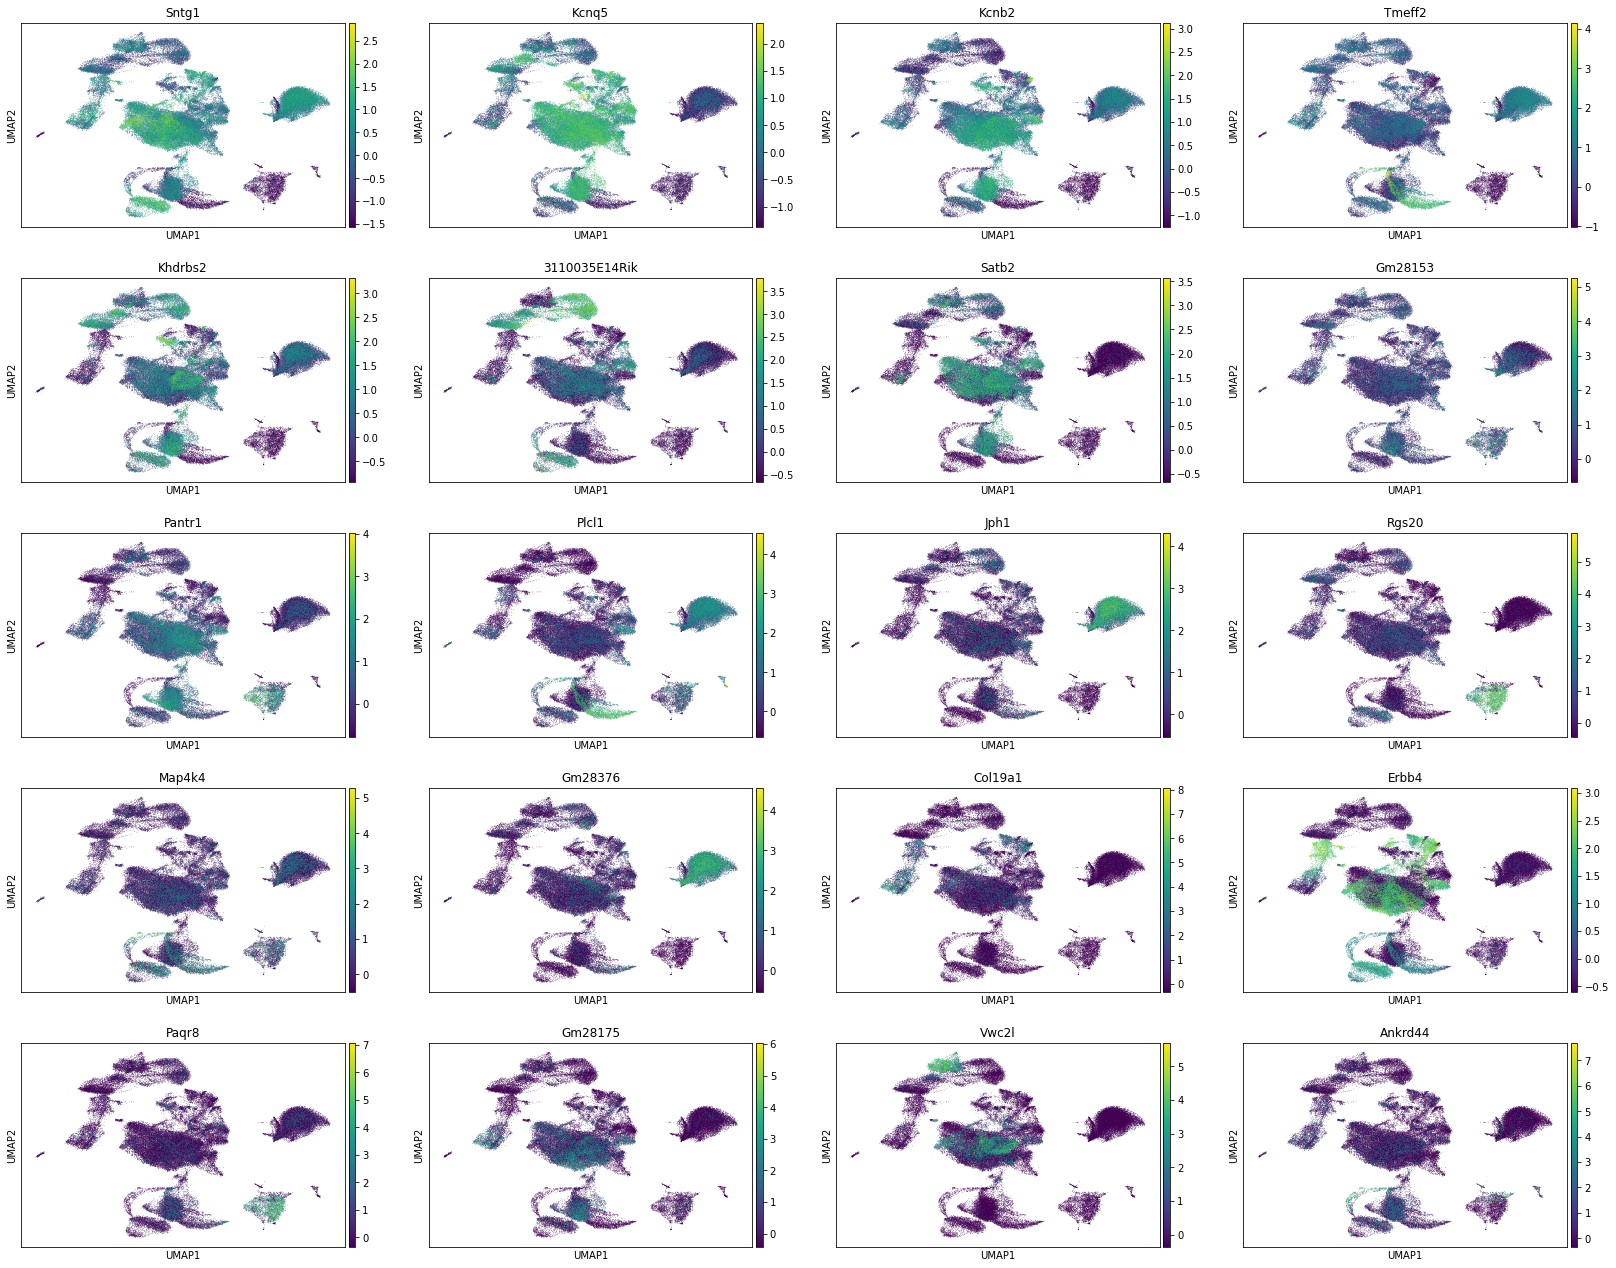

In [93]:
sc.pl.umap(adata, color = highvar)

In [70]:
adata.var.loc[adata.var.highly_variable == True]

,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
Sox17,4,False,4,4.361756,99.530516,3716.216064,True,0.102678,3.556366,1.607594,0.011063,0.199139
Lypla1,316,False,316,39.931915,62.910798,34021.992188,True,0.342752,3.595234,0.866723,0.097440,0.404770
Sntg1,75,False,75,7.191216,91.197183,6126.915527,True,0.065539,2.821124,1.063098,0.015177,0.178695
Rrs1,84,False,84,5.903913,90.140845,5030.133789,True,0.070190,2.704848,0.976989,0.018405,0.188593
1700034P13Rik,7,False,7,2.895509,99.178404,2466.973633,True,0.070248,2.931629,1.144935,0.014554,0.183728
...,...,...,...,...,...,...,...,...,...,...,...,...
G530011O06Rik,90,False,90,8.083245,89.436620,6886.924805,True,0.129731,2.876888,1.104395,0.030514,0.254487
Ube1y1_loc2,26,False,26,2.181570,96.948357,1858.697388,True,0.039461,2.168091,0.579484,0.012540,0.149745
Kdm5d,63,False,63,6.955827,92.605634,5926.364746,True,0.088463,2.549266,0.861769,0.022514,0.221021
Eif2s3y,203,False,203,20.188555,76.173709,17200.648438,True,0.174504,2.704017,0.976373,0.047044,0.306954


In [97]:
highvar

Index(['Ube2w', 'Tpp2', 'Inpp4a', 'Lypla1', 'Hs6st1', 'Slc39a10', 'Tram1',
       'Wdr75', 'Tmem131', 'Aff3', 'Mitd1', 'Ankrd39', 'Fam135a', 'Nab1',
       'Lman2l', 'Rnf149', 'Slco5a1', 'Tgfbrap1', 'Tbc1d8', 'Ercc5'],
      dtype='object')

In [135]:
print(results_file)
adata.write(results_file)

'mousebrain_scanpy.h5ad'

Format `adata.obs` to reflect the metadata file

---

In [137]:
adata

AnnData object with n_obs × n_vars = 96878 × 27799
    obs: 'exp_component_name', 'platform_label', 'cluster_color', 'cluster_order', 'cluster_label', 'class_color', 'class_order', 'class_label', 'subclass_color', 'subclass_order', 'subclass_label', 'full_genotype_color', 'full_genotype_id', 'full_genotype_label', 'sex_color', 'sex_id', 'donor_sex_label', 'region_color', 'region_id', 'region_label', 'cell_type_accession_color', 'cell_type_accession_id', 'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_alias_id', 'cell_type_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_id', 'cell_type_alt_alias_label', 'cell_type_designation_color', 'cell_type_designation_id', 'cell_type_designation_label', 'neighborhood_label', 'neighborhood_id', 'neighborhood_color', 'external_donor_name_color', 'external_donor_name_id', 'external_donor_name_label', 'facs_population_plan_color', 'facs_population_plan_id', 'facs_population_plan_label', 'injection_materials_color', 'inj

In [33]:
adata.raw.var.loc[adata.raw.var.highly_variable == True].sort_values('n_cells', ascending = False)[0:10]

,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
CTSB,6115,False,6115,4.530919,26.431665,37661.0,True,2.688134,3.375655,0.589317
LCN2,5814,False,5814,5.557387,30.052936,46193.0,True,2.700880,3.514611,0.897921
CD74,5136,False,5136,3.321343,38.209817,27607.0,True,2.372998,3.785988,1.629083
CEACAM5,4975,False,4975,3.985443,40.146776,33127.0,True,2.462350,3.361285,0.557402
NEAT1,4938,False,4938,3.355390,40.591915,27890.0,True,2.376558,4.244834,2.576250
IER3,4912,False,4912,2.536092,40.904716,21080.0,True,2.600159,3.391623,0.624780
AGR2,4689,False,4689,2.059552,43.587584,17119.0,True,1.879683,2.771776,1.031959
RARRES3,4653,False,4653,1.775505,44.020693,14758.0,True,1.855692,2.668403,0.666681
PI3,4602,False,4602,2.137993,44.634264,17771.0,True,2.129664,3.170779,0.705459
MSMB,4445,False,4445,2.480029,46.523099,20614.0,True,2.019013,3.122128,0.606439


In [101]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,louvain
L128_A01,278,277,9.971354e+05,0.0,0.0,3,0
L128_C01,2251,2250,9.998437e+05,0.0,0.0,1,1
L128_D01,2016,2016,1.000002e+06,0.0,0.0,1,2
L128_F01,1809,1807,9.996262e+05,0.0,0.0,0,1
L128_C03,479,478,9.985234e+05,0.0,0.0,3,2
...,...,...,...,...,...,...,...
L282_D06,643,643,1.000002e+06,0.0,0.0,3,0
L282_E06,1064,1062,9.999694e+05,0.0,0.0,2,0
L282_F06,405,403,9.994540e+05,0.0,0.0,2,0
L282_G06,402,400,9.999942e+05,0.0,0.0,2,0


In [154]:
meta = df[0:3].set_index('Sample ID').T
meta.head()

Sample ID,Cell picking session,Cell picking temperature,Sex
L128_A01,A,RT,male
L128_B01,A,RT,male
L128_C01,A,RT,male
L128_D01,A,RT,male
L128_E01,A,RT,male


In [161]:
adata.obs.index.name = 'Sample ID'
adata.obs[['Cell picking session', 'Cell picking temperature', 'Sex']] = meta[['Cell picking session', 'Cell picking temperature', 'Sex']]

In [168]:
adata.write(results_file)

... storing 'Cell picking session' as categorical
... storing 'Cell picking temperature' as categorical
... storing 'Sex' as categorical


---

In [4]:
adata = sc.read_h5ad('mousebrain_scanpy.h5ad')

Depending on the desired annotations and genes to be visualized by the user, the following command can be executed to create *singlecellVR*-compatible .JSON object. 

`scvr -f mousebrain_scanpy.h5ad -t scanpy -a ANNOTATIONS [-g GENES] [-o OUTPUT]`